<a href="https://colab.research.google.com/github/qwasd34/DEV_DATA/blob/main/1%E1%84%80%E1%85%A1%E1%86%BC_normalization_standardization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [3]:
# titanic 데이터셋 로드
df = sns.load_dataset('titanic')
df = df.loc[df['age'].isna()==False].reset_index(drop=True)

In [4]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
710,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
711,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
712,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<Axes: >

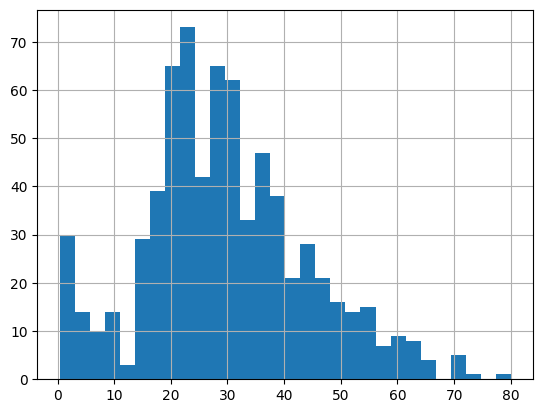

In [ ]:
df['age'].hist(bins=30)
# bin 히스토그램의 칸 1개 ..

<Axes: >

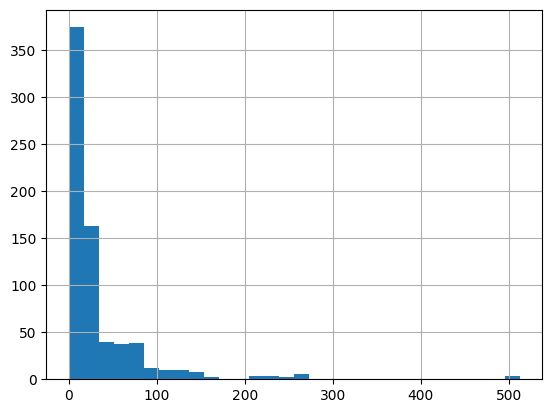

In [5]:
df['fare'].hist(bins=30)

Minmax scaling

In [ ]:
scaler = MinMaxScaler()
df['fare_minmax'] = scaler.fit_transform(df['fare'].values.reshape(-1, 1))
df['age_minmax'] = scaler.fit_transform(df['age'].values.reshape(-1, 1))

<Axes: >

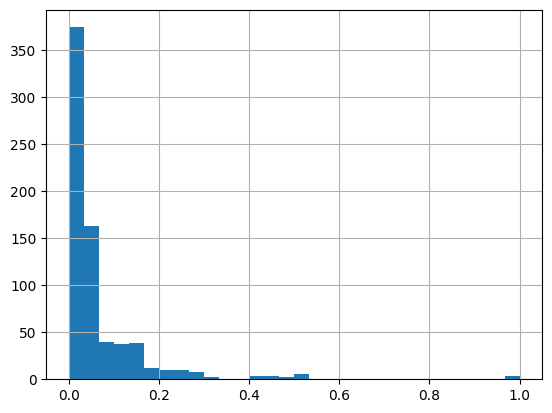

In [ ]:
df['fare_minmax'].hist(bins=30)

<Axes: >

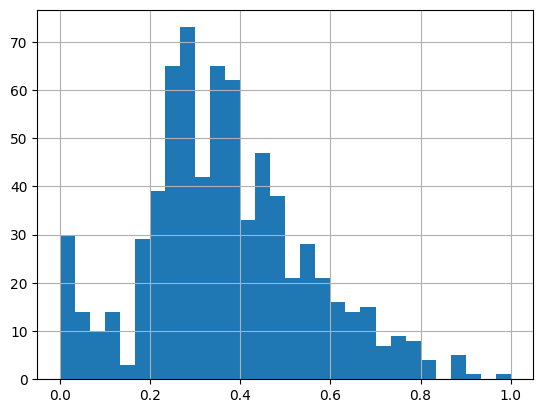

In [ ]:
df['age_minmax'].hist(bins=30)

Standardization(z-score scaling)

In [ ]:
scaler = StandardScaler()
df['fare_standard'] = scaler.fit_transform(df['fare'].values.reshape(-1, 1))
df['age_standard'] = scaler.fit_transform(df['age'].values.reshape(-1, 1))

<Axes: >

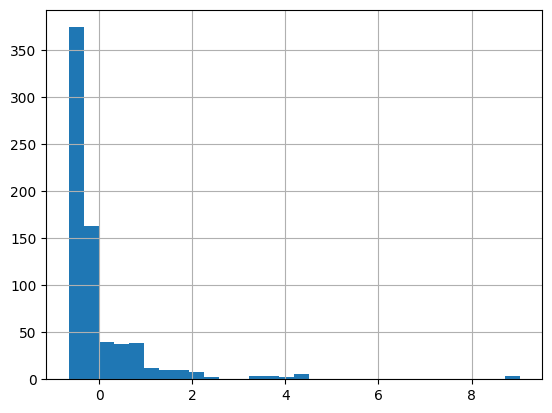

In [ ]:
df['fare_standard'].hist(bins=30)

<Axes: >

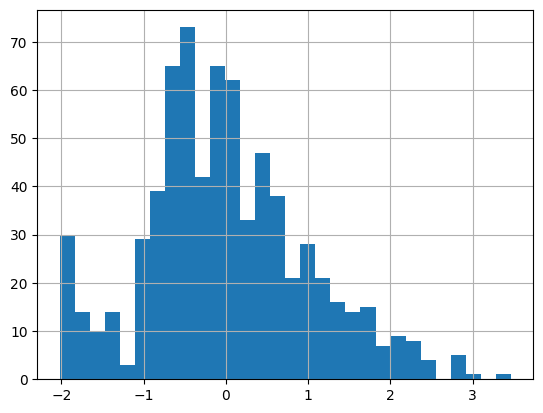

In [ ]:
df['age_standard'].hist(bins=30)

Log/power scale

In [ ]:
# np random 함수를 통해 난수 생성
exp_scale_data = np.random.exponential(1,300)
df_exp = pd.DataFrame(columns=['x'])
df_exp['x'] = exp_scale_data

<Axes: >

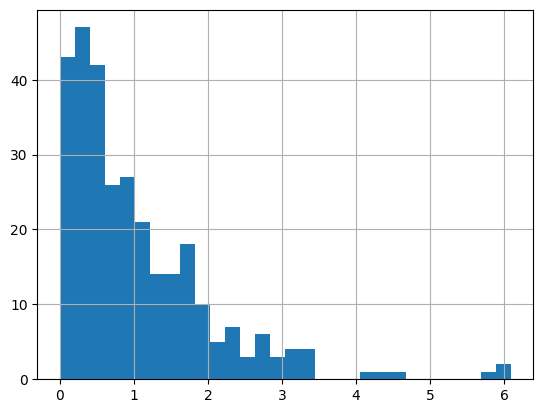

In [ ]:
df_exp['x'].hist(bins=30)

In [ ]:
# Log scaling
df_exp['log_x'] = np.log(df_exp['x'])

<Axes: >

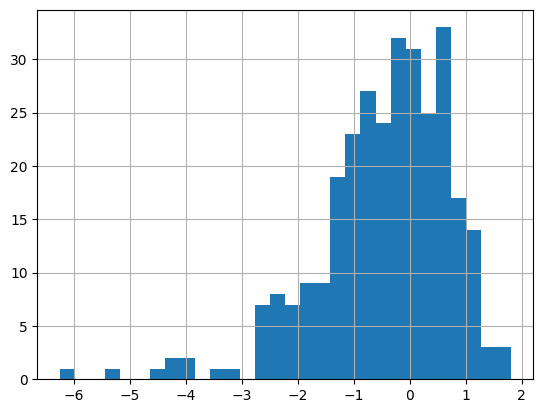

In [ ]:
df_exp['log_x'].hist(bins=30)

titanic 데이터셋에서 fare 항목에 추가적인 scaling을 해봅시다

In [ ]:
0 in df['fare'].values

True

log(0) = -inf 이기 때문에 log 대신 square root로 scaling을 해봅시다

In [ ]:
df['fare_sqrt'] = np.sqrt(df['fare'])

<Axes: >

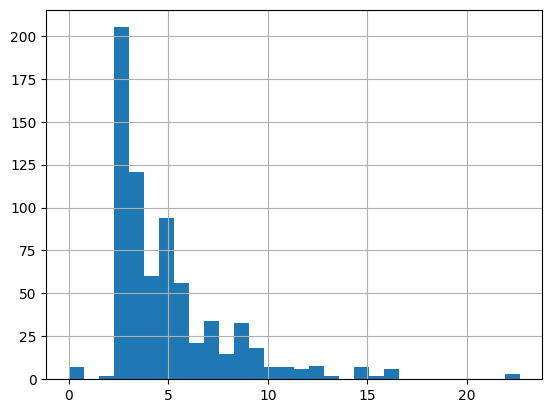

In [ ]:
df['fare_sqrt'].hist(bins=30)

위와 같이, 나중에 배우실 데이터 시각화를 이용하여 데이터의 분포를 살펴보면서 데이터를 스케일링 해주는 것이 효과적입니다
